# Custom Layers in Keras

# 1. Importing Libraries

In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# 2. Import and Visualize Dataset

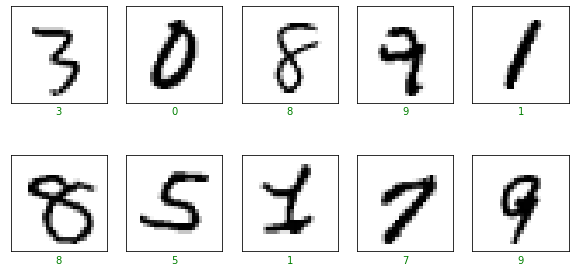

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show()

# 3. Creating a Custom Layer

In [3]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='alpha', shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
        
    def call(self, x):
        return tf.maximum(0.,x) + self.alpha*tf.minimum(0.,x)

# 4. Creating the Model

In [4]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


# 5. Model Training

In [5]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=5
)

Initial alpha: [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2929 - accuracy: 0.9179 - val_loss: 0.1489 - val_accuracy: 0.9553
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1273 - accuracy: 0.9617 - val_loss: 0.1132 - val_accuracy: 0.9658
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0903 - accuracy: 0.9732 - val_loss: 0.0948 - val_accuracy: 0.9707
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0708 - accuracy: 0.9782 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 5/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0864 - val_accuracy: 0.9753


In [6]:
print('Final alpha:', model.layers[1].get_weights())

Final alpha: [array([-0.8564298], dtype=float32)]


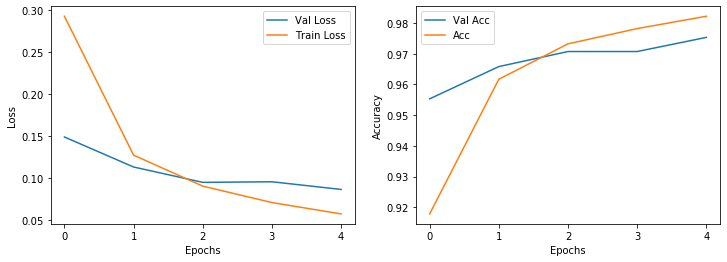

In [7]:
utils.plot_results(h).show()

# 6. Comparison with ReLU

In [8]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
h = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=5
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2906 - accuracy: 0.9173 - val_loss: 0.1611 - val_accuracy: 0.9525
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1387 - accuracy: 0.9592 - val_loss: 0.1277 - val_accuracy: 0.9617
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1010 - accuracy: 0.9701 - val_loss: 0.0991 - val_accuracy: 0.9693
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0883 - val_accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0657 - accuracy: 0.9806 - val_loss: 0.0867 - val_accuracy: 0.9748


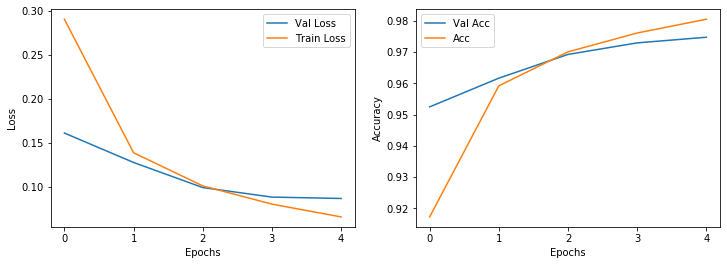

In [11]:
utils.plot_results(h).show()